
# Yellow Taxi Trip Data Analysis

This notebook provides an end-to-end analysis of NYC Yellow Taxi trip data using the CRISP-DM methodology. It includes:
1. **Data cleaning and preprocessing**: Preparing the dataset for analysis.
2. **MapReduce simulation**: Simulating distributed data aggregation tasks locally.
3. **Clustering analysis using K-Means**: Identifying patterns in taxi trip data.
4. **Visualization and business insights**: Presenting actionable insights.

## Dataset Overview
The dataset includes details about trip distance, fare, pickup/dropoff locations, and other trip attributes.


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime


## Step 1: Load and Explore the Dataset

In [ ]:

# Load the dataset
file_path = 'taxi_tripdata.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


/var/folders/ff/rs0n08ks49scy3y95_gm7mvh0000gn/T/ipykernel_371/4133278245.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [3]:

# Display dataset information
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000



## Step 2: Data Cleaning

We perform the following data cleaning steps:
1. Drop irrelevant or empty columns.
2. Convert datetime fields to proper datetime format.
3. Remove rows with non-positive trip distances or fares.
4. Handle missing values in critical columns.


In [4]:

# Drop irrelevant or empty columns
df.drop(columns=['ehail_fee'], inplace=True)

# Convert datetime columns to datetime objects
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Filter out trips with non-positive distances or fares
df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

# Drop rows with missing values in critical columns
df.dropna(subset=['trip_distance', 'total_amount'], inplace=True)

# Add trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Display cleaned data
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333



## Step 3: MapReduce Simulation

### Analysis 1: Count Trips by Pickup Location
Using MapReduce, we calculate the total number of trips for each pickup location (PULocationID).

### Analysis 2: Average Trip Duration by Pickup Location
We calculate the average trip duration for each pickup location to identify regions with long or short trips.

### Analysis 3: Distribution of Payment Types
We analyze the distribution of payment methods (e.g., cash, credit card) to provide insights into passenger behavior.


In [5]:

# Count trips by pickup location
trip_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Display the top 10 locations by trip count
trip_counts.sort_values(by='trip_count', ascending=False).head(10)


,PULocationID,trip_count
70,74,8676
71,75,7582
37,41,4686
38,42,3126
91,95,2405
157,166,2347
232,244,2230
4,7,1756
93,97,1721
61,65,1515


In [6]:

# Calculate average trip duration by pickup location
avg_duration = df.groupby('PULocationID')['trip_duration'].mean().reset_index(name='avg_trip_duration')

# Display the top 10 locations with longest average trip durations
avg_duration.sort_values(by='avg_trip_duration', ascending=False).head(10)


,PULocationID,avg_trip_duration
123,132,105.498000
3,6,72.063889
109,118,70.879167
195,207,67.115278
80,84,63.033333
19,23,57.319679
89,93,56.255382
64,68,55.698113
251,265,55.103041
147,156,50.516667


In [10]:

# Map payment_type codes to descriptive strings
payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Replace payment_type codes with their corresponding descriptions
df['payment_type'] = df['payment_type'].map(payment_mapping)

# Count payment types
payment_distribution = df['payment_type'].value_counts().reset_index(name='count')
payment_distribution.columns = ['payment_type', 'count']

# Display the distribution of payment types
payment_distribution



,payment_type,count
0,Credit card,27961
1,Cash,20036
2,No charge,152
3,Dispute,20
4,Unknown,1



## Step 4: Clustering Analysis

We use K-Means clustering to identify patterns in taxi trips. The following steps are included:
1. Normalize the features `trip_distance` and `total_amount` as well as `trip_duration` vs. `cost_per_mile`.
2. Apply K-Means clustering with an optimal number of clusters.
3. Visualize the clusters and evaluate the clustering quality using silhouette scores.


/Users/jmlaurie/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5820580288366511


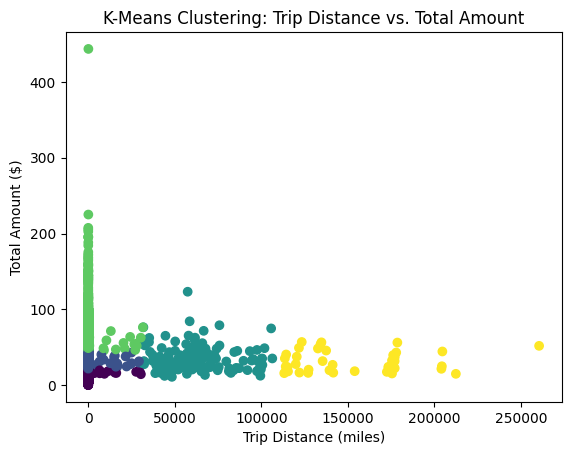

In [8]:

# Select features for clustering
features = df[['trip_distance', 'total_amount']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(features_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize clusters
plt.scatter(features['trip_distance'], features['total_amount'], c=df['cluster'], cmap='viridis')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.title('K-Means Clustering: Trip Distance vs. Total Amount')
plt.show()


/Users/jmlaurie/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


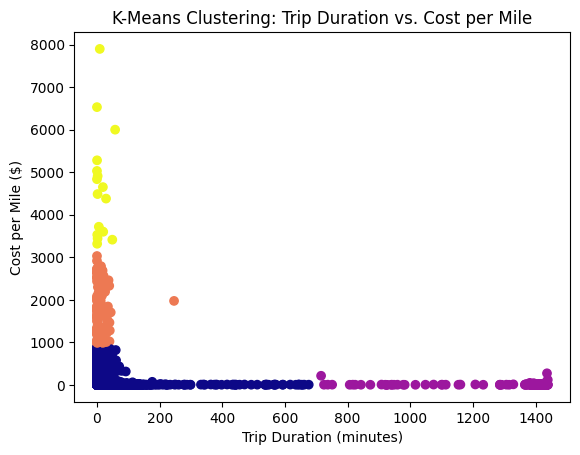

In [ ]:

# Add cost_per_mile
df['cost_per_mile'] = df['total_amount'] / df['trip_distance']

# Visualize trip duration vs. cost per mile
features_2 = df[['trip_duration', 'cost_per_mile']].dropna()
features_scaled_2 = scaler.fit_transform(features_2)
kmeans_2 = KMeans(n_clusters=4, random_state=42)
df['cluster_2'] = kmeans_2.fit_predict(features_scaled_2)

plt.scatter(features_2['trip_duration'], features_2['cost_per_mile'], c=df['cluster_2'], cmap='plasma')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Cost per Mile ($)')
plt.title('K-Means Clustering: Trip Duration vs. Cost per Mile')
plt.show()


# Step 5: Evaluation

## Map Reduce Simulation    

From the Map Reduce simulation, we are going to take a look at the outputs and are going to see trends that we might want to take a closer look at.

First, we see that we have two primary pickup locations that are getting the most business: Pickup location 74 and 75. Pickup location 74 has 8676 transactions and location 75 has 7582. The next highest pickup location is location 41 with 4686 transactions. This is quite a jump from our top two and it is at a steady decrease after that. This information can be useful because it can help the taxi driving company predict where they can give the most rides which ulimately leads to more revenue.

From the second analysis, we can see the average trip duration from each pickup location. Location 132 has the highest average at 105.5 minutes per trip. The lowest average trip duration comes from location 156 with an average duration of 50.52 minutes. This can be useful to the taxi company because they can look at which locations will, on average, take longer or shorter and station their drivers around these areas. Doing so can help drivers decide if they want to give longer or shorter rides which can predict their revenue.

The thrid analysis looks at the most common forms of payment. Payments with a credit card are the most common with 27961 transactions with cash payments coming in at second with 20036 transactions. We can see that there is about a 7000 differnce in these transactions, meaning that they should try to keep their card readers fixed so that they have no issues when it comes to the most common form of payment. We also see that there are 152 transactions that were no charge and 20 that were disputed. Based on the reasons for this, we can try to help to minimize these transactions, so that we can generate more revenue. 

## K-Mean Clusters

We are going to analyze the K-Mean Clusters and what they can tell us about our data.

In the first graph, we are taking a look at the trip distance vs total amount. In this graph we can see that the majority of our data falls inbetween 0 miles to 100,000 miles for the trip distance and $0 to $100 fro the total amount. We have two key outliers, the first is a trip that was very short (looks around a little over 0 miles), but cost over $400. It would be important to take a closer look at this and find out th reason why the trip costs so much for how short the distance was. The second outlier was a trip that had a distance over 250,000 miles, but cost less than $100. We would need to look deeper into this and find the reason for why a trip this long cost so little. Another thing to look at would be the lime green cluster. We see here that they are all very short trips, but have a high price with them. Some of which are very more expensive than drips that are 200,000 more miles. Overall, we can see that the majority of our trips are around the 50,000 mile mark and cost around $50. 

In the second graph, we are looking at the trip duration compared to the cost per mile. Looking at this we notice two trends, the first being that for two of our clusters (blue and purple), the cost per mile does not change as the trip duration goes up. We see that, for the most part, their average cost per mile is a little over $0 through a range of trip durations from 0 minutes to over 1400 minutes. This is interesting when we look at our second trend. The second trend we see is that the other two clusters (orange and yellow) don't change too much in trip duration, but the cost per mile is increasing. We see that their average trip duration is about 0 minutes to about 100 minutes, but the cost per mile ranges from about $1000 to about $8000. The mark at $8000 is and outlier and we could consider two other points outliers as well. This is interesting because the cost is very high considering how short the trip is. When we compare these two trends, we can ask ourselves why does the first two clusters have such a low cost per mile when the trip duration is high compared to the second two clusters who have high cost per mile and low trip durations. This is something we want to take a look at because one would assume that there would be a postive correlation between trip duration and cost per mile but that is not the case here. 

# Step 6: Deployment

During our deployment process we will start by implementing key insights. Particuarly prioritzing stationing drivers at high-demand locations (74 and 75)to maximize ride availablity and revenue. On the other end we will use the data on lower-demand locations (41) to look at promotions to increase business. Next we will look at managing outliers such as the Cost and Distance Anomalies to ensure data accuracy and improve pricing algorithms. In reguards to our actual deployment we will levergae platforms like Amazon EMR for scalable processing of MapReduce and K-Means clustering. This also will allow use to schedule tools liek AWS to automate data processing and analysis. Creating a dashboard can help us with our analaysis by highlighting key metrics, such as high-demand locations, average trip durations and flagged anomalies. This also will help with creating an alert that will flag unusal trip characteristics. This deployment will enable our taxi company to leverage data-driven insights for efficient operations, targeted driver placement, enhanced customer experiences, and increased revenue. Regular monitoring and iterative enhancements will ensure long-term success and adaptability.

